# <font size= "6"> TRAVEL AGGREGATOR ANALYSIS</font>

# <font size= "3"> Students Name: ABEGYAH MATTHEW</font>
# <font size= "3"> Program: DATA SCIENCE AND MACHINE LEARNING </font>
# <font size= "3"> Compiler Used: JUPYTER NOTEBOOK </font>
# <font size= "3"> Project Name: TRAVEL AGGREGATOR ANALYSIS</font>
# <font size= "3"> Module Number: 25</font>
# <font size= "3"> Submitted Date: 27TH,JANUARY, 2025</font>
# <font size= "3"> Email: abegyahmatthew@gmail.com</font>
# <font size= "3"> Phone: +233545378452 </font>


# <font size= "5"> A Brief Description of the project </font>
# <font size= "3"> MyNextBooking, an Indian start-up, simplifies travel bookings by aggregating top platforms like Yatra, MMT, and Goibibo, enabling users to compare prices and redirecting them to the best option. As an analyst proficient in Python, my role is to conduct in-depth analysis of the company's collected data to optimize price comparison processes and improve user experience.</font>

# <font size= "5"> Expectations From The Hired Data Analyst</font>
# <font size= "3">As a newly hired data analyst and proficient in python, I am to use two different dataset (Bookings.CSV and Session.CSV) and analyze it based on the below questions they company asked and expecting result:.</font>

In [52]:
# To start with the task, there are some essential python Libraries that will be needed to complete the project. 
# I have already installed them on my compiler and only need to import them to complete this project
# the below codes import the libraries needed to manipulate and visually analyze the data
# Importing libraries
import pandas as pd  # This library will be used for data manipulation and analysis
import numpy as np  # This library will be used for numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualizations
from datetime import datetime  # For date and time handling

# The below codes load the given two different CSV dataset (Bookings and Sessions) into the compilar for easy manipulation and analysis
# the pandas library will be used to read the booking data 
import pandas as pd
bookings = pd.read_csv('Bookings.csv')  # Bookings data
sessions = pd.read_csv('Sessions.csv')  # Sessions data

# To really understand the structure and the columns in the datasets, there is the need for me to explore and check if the data contains:
# The colunms needed for the analysis
# Check for duplications and see if there is the needed to remove them to ensure accuracy, data quality and reduce redundancy
print(bookings.head(1))# Displaying the first two rows to have insight about the bookings column structure
print(sessions.head(1))# Displaying the first two rows to have insight about the bookings column structure

# To have more insight about the dataset there's a need to check if:
# each of the datasets has missing values
print("Checking for missing values in the Bookings Dataset")# This code prints the description texts for the Booking dataset 
print(bookings.isnull())# checks and retrun a boolean if there is an empty row
print("Checking for missing values in the sessions Dataset")# This code prints the description texts for the Booking dataset
print(sessions.isnull())# checks and retrun a boolean if there is an empty row

    customer_id  booking_id from_city from_country    to_city to_country  \
0  customer_259  booking_82   Gurgaon        India  Ahmedabad      India   

           booking_time device_type_used  INR_Amount service_name  \
0  2020-02-05T16:12:08Z          Desktop     2565.28          MMT   

   no_of_passengers  days_to_departure  distance_km  
0               1.0               10.0        747.8  
    session_id   search_id               search_time session_starting_time  \
0  session_322  search_784  2020-01-21T21:35:38.910Z  2020-01-21T21:10:12Z   

  booking_id  
0        NaN  
Checking for missing values in the Bookings Dataset
     customer_id  booking_id  from_city  from_country  to_city  to_country  \
0          False       False      False         False    False       False   
1          False       False      False         False    False       False   
2          False       False      False         False    False       False   
3          False       False      False         F

# <font size= "3">Now that the needed libraries have been imported, datasets have been loaded and read in the compiler, checke for null values and I have gotten more insight about the raw CSV files (Bookings,Sessions), I will go ahead and answer the given questions .</font>

# <font size= "5"> Question 1 </font>

 # <font size= "3">Find the number of distinct bookings, sessions, and searches from the given data sets.</font>

The number of distinct bookings are: 339 

The number of distinct sessions are: 331

The number of distinct search are: 1360



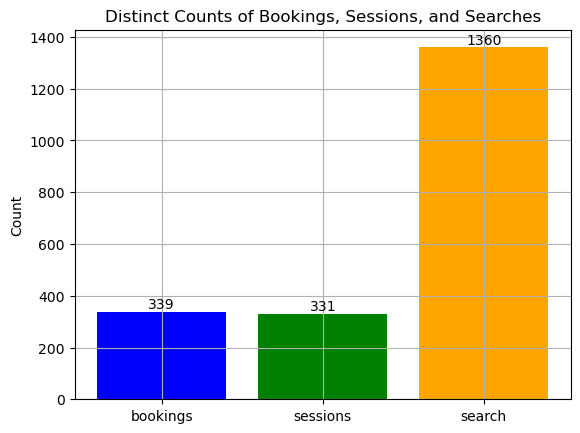

In [53]:
# The below codes create three different variables to store the number of distinct count for each of the following:
# Bookings
# Search, and
# Sessions
# The nunique() method was used to retrieve the number of unique values from the ID's to help eliminate duplicates

find_distinct_bookings = bookings["booking_id"].nunique()# finding and storing the number of distinct bookings in this variable
find_distinct_sessions = sessions["session_id"].nunique()# finding and storing the number of distinct sessions in this variable
find_distinct_search = sessions["search_id"].nunique()# finding and finding the number of distinct searchs in this variable
print(f"The number of distinct bookings are: {find_distinct_bookings} \n")# displaying the distinct bookings in the console in numeric form
print(f"The number of distinct sessions are: {find_distinct_sessions}\n")# displaying the distinct sessions in the console in numeric form
print(f"The number of distinct search are: {find_distinct_search}\n")# displaying the distinct search in the console in numeric form

# for better and easy understanding of the output, the number of distinct bookings, sessions and search is required to be displayed on a graph
# The matplotlib.pyplot library will be used in performing this task
import matplotlib.pyplot as plt  # For plotting
# to plot the result, I will create a dictionary to hold the distinct count and the
distinct_counts = {
    "bookings": 339,
    "sessions": 331,
    "search":1360}# creating a dictionary to hold the distinct count as keys needed for the 
# Plotting bar chart
plt.bar(distinct_counts.keys(), distinct_counts.values(), color=['blue', 'green', 'orange'])# creating a bar graph with the data
plt.title('Distinct Counts of Bookings, Sessions, and Searches')# Title for the graph
plt.ylabel('Count')# A code to display a label for the vertical line(y-axis)
plt.grid()# Display a gridline in tge chart
# Iterate through the key-value pairs in the distinct_counts dictionary
for key, value in distinct_counts.items():
    # Add a text label at each data point on the plot
    # - 'key' specifies the x-coordinate (the dictionary key)
    # - 'value' specifies the y-coordinate (the dictionary value)
    # - str(value) converts the value to a string to display as a label
    # - ha='center' aligns the text horizontally at the center of the label
    # - va='bottom' aligns the text vertically just below the data point
    plt.text(key, value, str(value), ha='center', va='bottom') #Displays the text label at the top of the graph 
plt.show()#displaying the graph

# <font size= "5"> Question 2 </font>

 # <font size= "3">How many sessions have more than one booking?
</font>

Sessions with more than one booking: 10


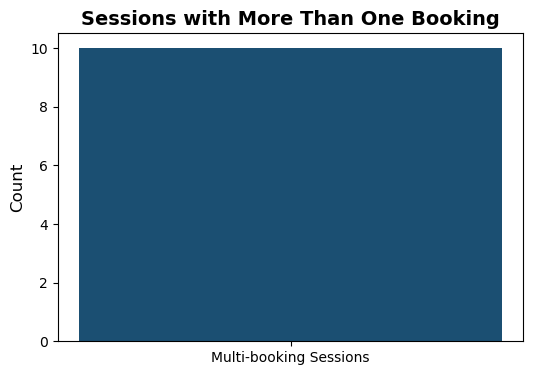

In [54]:
# Group the data by 'session_id' and count the number of unique 'booking_id's for each session
session_count_grouping = sessions.groupby("session_id")["booking_id"].nunique()
# Filter the sessions that have more than one unique booking and count them
more_than_one_booking = session_count_grouping[session_count_grouping > 1].count()
# Print the result: Number of sessions with more than one booking
print("Sessions with more than one booking:", more_than_one_booking)


# Create a new figure with a specified size of 4x4 inches
plt.figure(figsize=(6,4))
# Plot a bar chart with one bar labeled 'Multi-booking Sessions' and the corresponding value 'more_than_one_booking'
plt.bar(['Multi-booking Sessions'], [more_than_one_booking], color='#1b4f72')
# Set the title of the bar chart with a font size of 14 and bold weight
plt.title('Sessions with More Than One Booking', fontsize=14, weight='bold')
# Label the y-axis with the text 'Count' and font size of 12
plt.ylabel('Count', fontsize=12)
plt.show() # display the graph on the terminal




# <font size= "5"> Question 3 </font>

 # <font size= "3"> Which days of the week have the highest number of bookings? Also, draw a pie chart to show the distribution for all days of the week?
</font>

The count for boooking for each day: day_of_week
Thursday     65
Tuesday      59
Monday       51
Friday       51
Saturday     44
Sunday       35
Wednesday    34
Name: count, dtype: int64
The day with the highest number of bookings is: Thursday


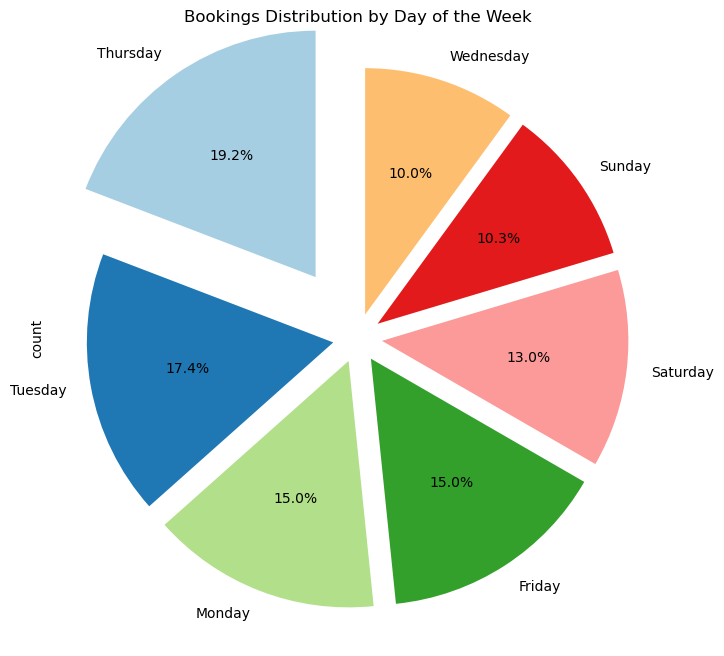

In [55]:
# pandas and matplotlib.pyplot library will be used to complete this task
import pandas as pd
import matplotlib.pyplot as plt

# Convert booking_time to datetime
# This converts the 'booking_time' column into datetime format
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'])

# Extract the day of the week from the booking time
# This adds a new column 'day_of_week' containing the day names (e.g., Monday, Tuesday, etc.)
bookings['day_of_week'] = bookings['booking_time'].dt.day_name()

# Create a DataFrame from the 'bookings' data, extracting the 'day_of_week' column
# Use the value_counts() method to count the occurrences of each unique day
counting_daily_book = pd.DataFrame(bookings)["day_of_week"].value_counts()

# Print the resulting Series, which shows the count of bookings for each day of the week
print(f"The count for boooking for each day: {counting_daily_book}");

# Count the number of bookings for each day of the week
# 'value_counts' returns a count of unique values in the 'day_of_week' column
bookings_by_day = bookings['day_of_week'].value_counts()

# Find the day of the week with the highest number of bookings
day_with_highest_bookings = bookings_by_day.idxmax()

# Print the result
print(f"The day with the highest number of bookings is: {day_with_highest_bookings}");

# Define explode to emphasize the day with the highest bookings
# Explode will only highlight the day with the maximum count
explode = [0.1 if day != day_with_highest_bookings else 0.3 for day in bookings_by_day.index]

# Plot pie chart
# 'autopct' is used to display percentage labels, and 'figsize' sets the size of the chart
bookings_by_day.plot.pie( autopct='%1.1f%%',  figsize=(8, 8),  explode=explode,  startangle=90,  colors=plt.cm.Paired.colors)
plt.title('Bookings Distribution by Day of the Week')# Add title to the chart
plt.show()# Show the chart

# <font size= "5"> Question 4 </font>

 # <font size= "3"> For each of the service names, display the total number of bookings and the total Gross Booking Value in INR.
</font>

              total_bookings  total_gross_value
service_name                                   
GOIBIBO                  186         5897637.97
MMT                       48          665669.08
YATRA                    105         3378702.13


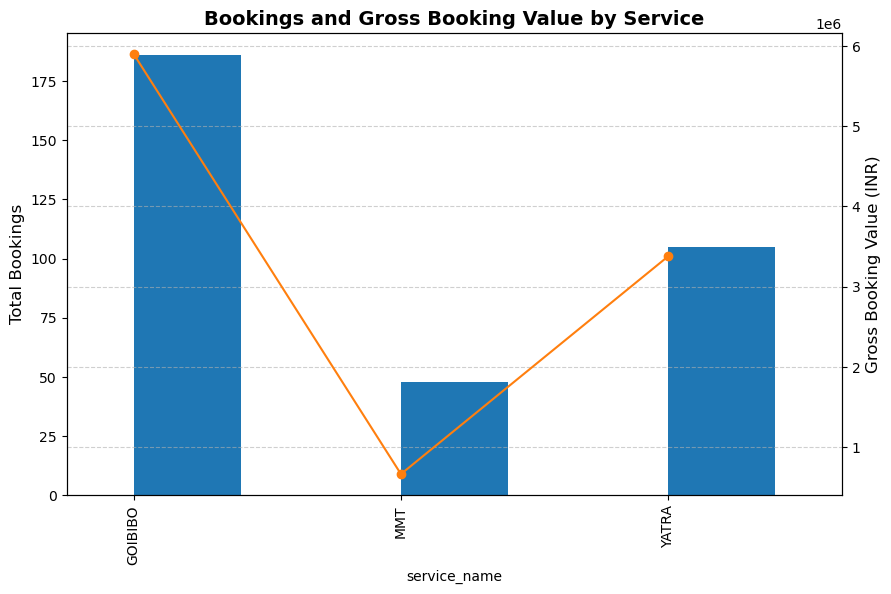

In [56]:
# Group the 'bookings' DataFrame by the column 'service_name'
# and calculate aggregate statistics for each service
service_name_grouping = bookings.groupby('service_name').agg(
    # Count the number of bookings for each service (using 'booking_id')
    total_bookings=('booking_id', 'count'),
    # Sum the gross value (in INR) for each service (using 'INR_Amount')
    total_gross_value=('INR_Amount', 'sum')
)
# Print the resulting DataFrame 'service_name', which contains the aggregated statistics
print(service_name_grouping)

# Create a figure and primary axis for plotting, with a specified figure size of 10x6 inches
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot a bar chart for 'total_bookings' using the primary axis
service_name_grouping['total_bookings'].plot(
    kind='bar',          # Specify the chart type as a bar chart
    color='#1f77b4',     # Use a blue color for the bars
    ax=ax1,              # Plot on the primary axis
    position=0,          # Position the bars at the default locations
    width=0.4            # Set the width of the bars to 0.4
)
# Label the y-axis of the primary axis
ax1.set_ylabel('Total Bookings', fontsize=12)
# Add a title to the plot
ax1.set_title('Bookings and Gross Booking Value by Service', fontsize=14, weight='bold')
# Create a secondary y-axis that shares the same x-axis as the primary axis
ax2 = ax1.twinx()
# Plot a line chart for 'total_gross_value' using the secondary axis
service_name_grouping['total_gross_value'].plot(
    kind='line',         # Specify the chart type as a line chart
    marker='o',          # Add circle markers to the line
    color='#ff7f0e',     # Use an orange color for the line
    ax=ax2               # Plot on the secondary axis
)
# Label the y-axis of the secondary axis
ax2.set_ylabel('Gross Booking Value (INR)', fontsize=12)
# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)
# Add grid lines to the y-axis for both axes, using dashed lines with transparency
plt.grid(axis='y', linestyle='--', alpha=0.6)
# Display the plot
plt.show()

# <font size= "5"> Question 5 </font>

 # <font size= "3">For customers who have more than 1 booking, which is the most booked route (from_city to to_city)? 
</font>

Most Booked Route: ('Gurgaon', 'Roissy-en-France')


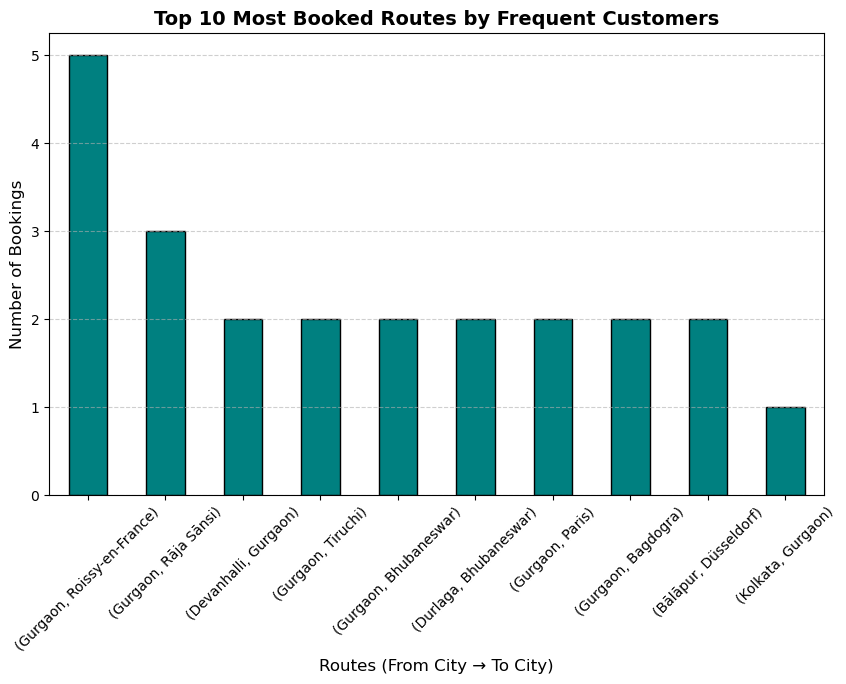

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the 'bookings' DataFrame by 'customer_id' and count unique 'booking_id' values for each customer
frequent_customers = bookings.groupby('customer_id')['booking_id'].nunique()
# Filter customers who have made more than one booking
frequent_customers = frequent_customers[frequent_customers > 1].index
# Filter the 'bookings' DataFrame to include only bookings made by frequent customers
frequent_routes = bookings[bookings['customer_id'].isin(frequent_customers)]
# Group the data by 'from_city' and 'to_city', count the occurrences, and find the most booked route
most_booked_route = frequent_routes.groupby(['from_city', 'to_city']).size().idxmax()
# Print the most booked route
print("Most Booked Route:", most_booked_route)

# --- Visualization ---
# Count the occurrences of each route (combination of 'from_city' and 'to_city') for frequent customers
route_counts = frequent_routes.groupby(['from_city', 'to_city']).size()

# Sort the route counts in descending order
route_counts = route_counts.sort_values(ascending=False)

# Plot the top 10 most booked routes as a bar chart
route_counts.head(10).plot(
    kind='bar',          # Bar chart for visualization
    color='teal',        # Use teal color for bars
    figsize=(10, 6),     # Set the figure size to 10x6 inches
    edgecolor='black'    # Add black edges around the bars
)
plt.title('Top 10 Most Booked Routes by Frequent Customers', fontsize=14, weight='bold')# Add a title to the chart
plt.xlabel('Routes (From City → To City)', fontsize=12)# Label the x-axis
plt.ylabel('Number of Bookings', fontsize=12)# Label the y-axis
plt.xticks(rotation=45)# Rotate the x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)# Display the grid for the y-axis
plt.show()# Show the plot


# <font size= "5"> Question 6 </font>

 # <font size= "3">Which are the top 3 departure cities from where customers book mostly in advance, provided that there have been at least 5 departures from that city?</font>

            count       mean
from_city                   
Bālāpur         6  46.166667
Devanhalli     24  29.583333
Chennai        16  26.187500


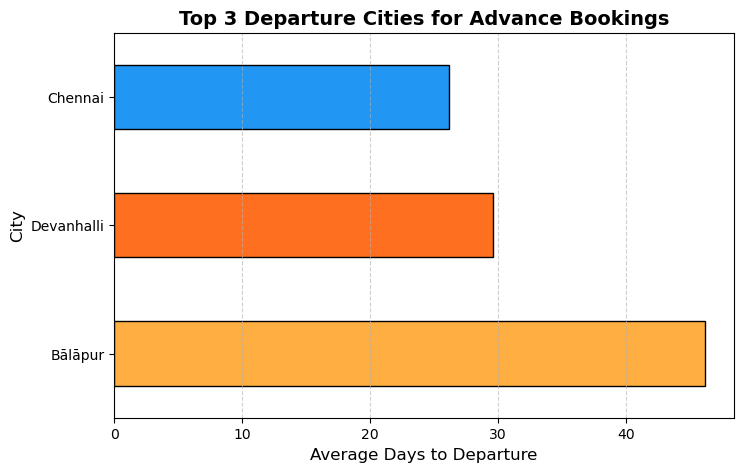

In [58]:
# Group the 'bookings' DataFrame by the 'from_city' column
# Aggregate data for each city by calculating:
# - 'count': Total number of bookings ('days_to_departure')
# - 'mean': Average number of days to departure
city_departures = bookings.groupby('from_city')['days_to_departure'].agg(['count', 'mean'])

# Filter the grouped data to include only cities with at least 5 bookings
city_departures = city_departures[city_departures['count'] >= 5]
# Sort the filtered data by the 'mean' column (average days to departure) in descending order
# Select the top 3 cities with the highest average days to departure
top_cities = city_departures.sort_values(by='mean', ascending=False).head(3)
# Print the resulting DataFrame 'top_cities', which shows the top 3 departure cities
print(top_cities)


# Plot a horizontal bar chart for the 'mean' column in the 'top_cities' DataFrame
top_cities['mean'].plot(
    kind='barh',         # Specify the chart type as a horizontal bar chart
    color=['#ffae42', '#ff6f20', '#2196f3'],  # Use a specific color palette for the bars
    figsize=(8, 5),      # Set the figure size to 8x5 inches
    edgecolor='black'    # Add a black border around each bar for better distinction
)
plt.title('Top 3 Departure Cities for Advance Bookings', fontsize=14, weight='bold')# Set the title of the chart with a font size of 14 and bold weight
plt.xlabel('Average Days to Departure', fontsize=12)# Label the x-axis with 'Average Days to Departure' and set font size to 12
plt.ylabel('City', fontsize=12)# Label the y-axis with 'City' and set font size to 12
plt.grid(axis='x', linestyle='--', alpha=0.6)# Add grid lines to the x-axis for better readability, using dashed lines with transparency
plt.show()# Display the plot


# <font size= "5"> Question 7</font>
# <font size= "3">Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns in the bookings data set, have the maximum correlation?</font>

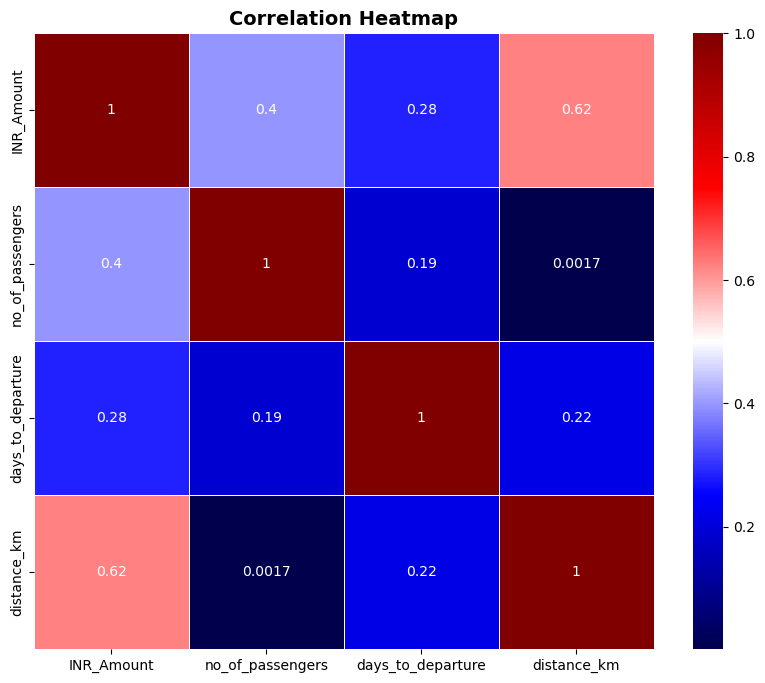

In [59]:
# Import necessary libraries for data visualization and analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns from the 'bookings' DataFrame
# 'select_dtypes' filters columns with data types 'float64' and 'int64'
numerical_cols = bookings.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for the selected numerical columns
# 'corr()' computes pairwise correlation between the columns
correlation_matrix = bookings[numerical_cols].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))  # Set the figure size to 10x8 inches
sns.heatmap(
    correlation_matrix,      # Pass the correlation matrix
    annot=True,              # Display correlation values inside the heatmap cells
    cmap='seismic',          # Use the 'seismic' colormap for a diverging color scale
    linewidths=0.5,          # Add gridlines between cells with a width of 0.5
    annot_kws={"size": 10}   # Set font size for the annotations
)
plt.title('Correlation Heatmap', fontsize=14, weight='bold')# Add a title to the heatmap
plt.show()# Display the heatmap


# <font size= "5"> Question 8</font>
# <font size= "3">For each service, which is the most used device type for making bookings on the platformm?</font>

device_type_used  Android  Desktop  IOS  MobileWeb  Tablet
service_name                                              
GOIBIBO                44       61   70         11       0
MMT                     8       30    5          5       0
YATRA                  18       51   22         11       3


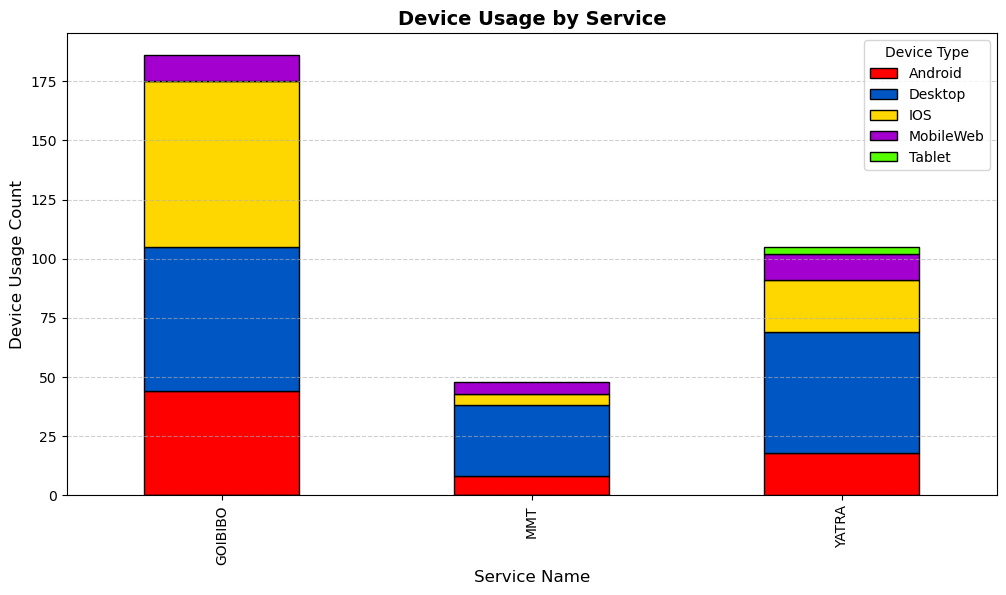

In [60]:
# Group the 'bookings' DataFrame by 'service_name' and 'device_type_used'
# Count the number of bookings for each combination of 'service_name' and 'device_type_used'
# Use 'unstack()' to reshape the data into a table where:
# - Rows represent 'service_name'
# - Columns represent 'device_type_used'
# - Fill missing values with 0
device_usage = bookings.groupby(['service_name', 'device_type_used']).size().unstack(fill_value=0)

# Print the reshaped data to view the device usage count by service
print(device_usage)

# Plot the device usage data as a stacked bar chart
device_usage.plot(
    kind='bar',            # Specify the chart type as a bar chart
    stacked=True,          # Stack the bars to show the total usage across devices
    figsize=(12, 6),       # Set the figure size to 12x6 inches
    colormap='prism',      # Use the 'tab10' colormap for a diverse color palette
    edgecolor='black'      # Add a black edge around each bar for better distinction
)
plt.title('Device Usage by Service', fontsize=14, weight='bold')# Add a descriptive title to the chart
plt.xlabel('Service Name', fontsize=12)# Label the x-axis as 'Service Name' with a font size of 12
plt.ylabel('Device Usage Count', fontsize=12)# Label the y-axis as 'Device Usage Count' with a font size of 12
plt.legend(title='Device Type', fontsize=10)# Add a legend to indicate device types, with a title and adjusted font size
plt.grid(axis='y', linestyle='--', alpha=0.6)# Add grid lines along the y-axis for better readability, using dashed lines with transparency
plt.show()# Display the plot

# <font size= "5"> Question 9</font>
# <font size= "3">Plot the trends at a quarterly frequency for the number of bookings by each of the device types, that is, plot a time series for each year and quarter showing the number of bookings performed by each device type.</font>

C:\Users\ABEGYAH MATTHEW\AppData\Local\Temp\ipykernel_22648\1204070526.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  bookings['quarter'] = bookings['booking_time'].dt.to_period('Q')


Device Trends Data:
device_type_used  Android  Desktop  IOS  MobileWeb  Tablet
quarter                                                   
2018Q3                  3        6    0          2       1
2018Q4                  3       22    4          4       1
2019Q1                  0        1    0          0       0
2019Q2                  0        1    0          0       1
2019Q3                  3        7    4          0       0
2019Q4                 14       15   14          0       0
2020Q1                 19       29   25         10       0
2020Q2                  2        0    0          0       0
2020Q3                  3        0    4          0       0
2020Q4                  6       12    2          1       0
2021Q1                  0       11    5          1       0
2021Q2                  2       10    3          0       0
2021Q3                  5        6    5          2       0
2021Q4                  6       10   14          4       0
2022Q1                  2        8  

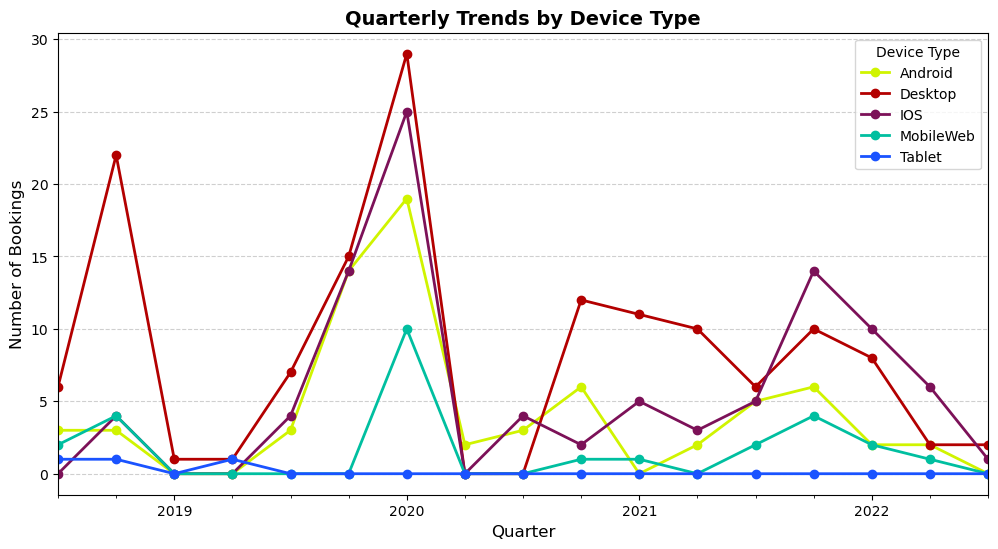

In [61]:
# Generate a new column 'quarter' from the 'booking_time' column
# This converts the 'booking_time' datetime column into quarterly periods (e.g., 2024Q1, 2024Q2)
bookings['quarter'] = bookings['booking_time'].dt.to_period('Q')

# Group the 'bookings' data by 'quarter' and 'device_type_used'
# Count the number of bookings for each combination of 'quarter' and 'device_type_used'
# Use 'unstack()' to pivot the data into a tabular format:
# - Rows represent quarters
# - Columns represent different device types
# Missing values are replaced with 0 using 'fill_value=0'
device_trends = bookings.groupby(['quarter', 'device_type_used']).size().unstack(fill_value=0)

# Print the tabular data of device trends to the console for verification
print("Device Trends Data:")
print(device_trends)

# Create a line plot to visualize device trends over quarters
device_trends.plot(
    kind='line',         # Use a line plot to show trends
    figsize=(12, 6),     # Set the figure size to 12x6 inches
    marker='o',          # Add circular markers to data points for better visibility
    linewidth=2,          # Increase the thickness of the lines for clarity
    color = ("#d0f400","#b30000", "#7c1158", "#00bfa0", "#1a53ff", "#e6d800")# setting color for the for the line plot for each of the device type
)

# Add a descriptive title to the plot with bold styling and larger font size
plt.title('Quarterly Trends by Device Type', fontsize=14, weight='bold',)
# Label the x-axis as 'Quarter' and set its font size
plt.xlabel('Quarter', fontsize=12)
# Label the y-axis as 'Number of Bookings' and set its font size
plt.ylabel('Number of Bookings', fontsize=12)
# Add a legend to indicate different device types, with a title and adjusted font size
plt.legend(title='Device Type', fontsize=10)
# Add horizontal grid lines to the y-axis for better readability
# Use dashed lines with slight transparency
plt.grid(axis='y', linestyle='--', alpha=0.6)
# Display the final plot
plt.show()


# <font size= "5"> Question 10</font>
# <font size= "3">Consider the following example:</font>
# <font size= "3">12 customers performed a total of 100 searches but only a few of them performed 10 bookings in total.
# <font size= "3">Searches = 100 bookings = 10 customers = 12</font
# <font size= "3">The overall booking to search ratio, Ober, is 10/100 = 0.1 Using the above</font
# <font size= "3">information/context, answer the following:</font
# <font size= "3">• What is the average oBSR for each month of the year?</font
# <font size= "3">• What is the average oBSR for each day of the week?</font
# <font size= "3">• Plot a time series of oBSR on all the given dates.</font>

Daily Searches:
date
2018-09-04     3
2018-09-11     2
2018-09-21     5
2018-09-23     1
2018-09-25    13
              ..
2022-04-05     2
2022-05-07     2
2022-06-01     1
2022-07-06     9
2022-07-11     3
Name: search_id, Length: 145, dtype: int64

Daily Bookings:
date
2018-09-04    1
2018-09-11    2
2018-09-21    2
2018-09-23    1
2018-09-25    3
             ..
2022-04-05    1
2022-05-07    1
2022-06-01    1
2022-07-06    1
2022-07-11    1
Name: booking_id, Length: 145, dtype: int64

Daily oBSR:
date
2018-09-04    0.333333
2018-09-11    1.000000
2018-09-21    0.400000
2018-09-23    1.000000
2018-09-25    0.230769
                ...   
2022-04-05    0.500000
2022-05-07    0.500000
2022-06-01    1.000000
2022-07-06    0.111111
2022-07-11    0.333333
Length: 145, dtype: float64


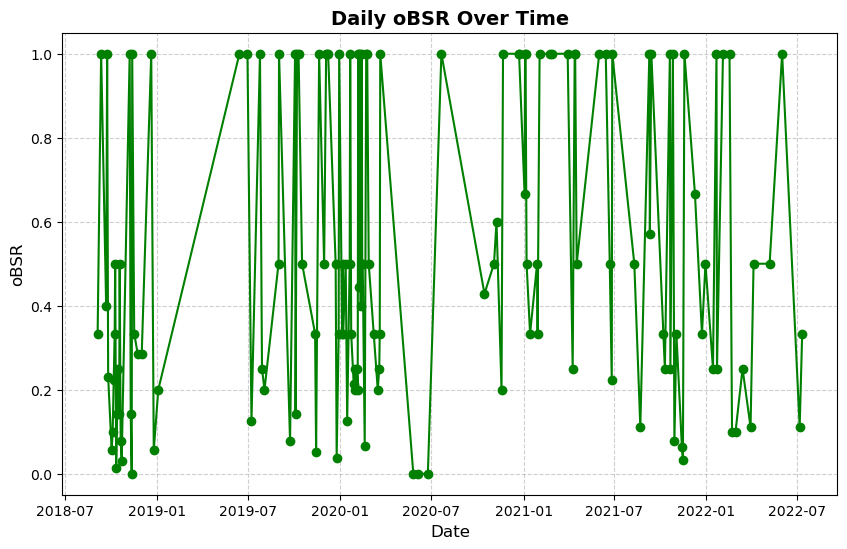

In [62]:
# Convert the 'session_starting_time' column to a datetime format and extract only the date (YYYY-MM-DD)
# The 'format' specifies the expected format of the datetime string, and 'errors=coerce' ensures invalid entries are converted to NaT (Not a Time)
sessions['date'] = pd.to_datetime(
    sessions['session_starting_time'], 
    format='%Y-%m-%dT%H:%M:%S.%fZ', 
    errors='coerce'
).dt.date  # Extract only the date part

# Group the sessions data by 'date' and count the number of 'search_id' entries for each day
# This represents the number of searches performed each day
daily_searches = sessions.groupby('date')['search_id'].count()

# Group the sessions data by 'date' and count the unique 'booking_id' values for each day
# This represents the number of distinct bookings made each day
daily_bookings = sessions.groupby('date')['booking_id'].nunique()

# Calculate the daily oBSR (Online Booking-to-Search Ratio) by dividing daily bookings by daily searches
# Fill missing values with 0 where there are no searches
daily_obsr = (daily_bookings / daily_searches).fillna(0)

print("Daily Searches:")#Print out the description for the daily searches
print(daily_searches)# Print out the results for the daily searches 
print("\nDaily Bookings:")# Print out the description for the daily bookings
print(daily_bookings)# Print out the results for the daily bookings
print("\nDaily oBSR:")# Print out the description for the calculated daily oBSR values
print(daily_obsr)# Printing out the output of the the calculated daily oBSR values

# Plot the daily oBSR as a time series line chart
# This will show how the oBSR (Online Booking-to-Search Ratio) changes over time (daily)
daily_obsr.plot(figsize=(10, 6), color='green', marker='o', linestyle='solid')
# Add a title to the plot with larger, bold font
plt.title('Daily oBSR Over Time', fontsize=14, weight='bold')
# Label the x-axis as 'Date' with font size 12
plt.xlabel('Date', fontsize=12)
# Label the y-axis as 'oBSR' (Online Booking-to-Search Ratio) with font size 12
plt.ylabel('oBSR', fontsize=12)
# Add gridlines to both axes with dashed lines and some transparency for better visibility
plt.grid(axis='both', linestyle='--', alpha=0.6)
# Display the plot
plt.show()
